***Fundamentals of Solar Cells and Photovoltaic Systems Engineering***

**Solutions Manual - Chapter 3**

***Problem 3.1***


***(a) Estimate the UV content (280-400nm) and the total irradiance in the extraterrestrial reference spectrum AM0, the global reference spectrum AM1.5G, and the direct reference spectrum AM1.5D***

We will use the package [pandas](https://pandas.pydata.org/) to handle the data and [matplotlib.pyplot](https://matplotlib.org/stable/index.html) to plot the results

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

We start by importing the data.

In [79]:
datafile = pd.read_csv('data/Reference_spectrum_ASTM-G173-03.csv', index_col=0, header=0) 
datafile

,AM0,AM1.5G,AM1.5D
Wvlgth nm,Etr W*m-2*nm-1,Global tilt W*m-2*nm-1,Direct+circumsolar W*m-2*nm-1
280,8.20E-02,4.73E-23,2.54E-26
280.5,9.90E-02,1.23E-21,1.09E-24
281,1.50E-01,5.69E-21,6.13E-24
281.5,2.12E-01,1.57E-19,2.75E-22
...,...,...,...
3980,8.84E-03,7.39E-03,7.40E-03
3985,8.80E-03,7.43E-03,7.45E-03
3990,8.78E-03,7.37E-03,7.39E-03
3995,8.70E-03,7.21E-03,7.23E-03


In [80]:
datafile.drop(datafile.index[0], inplace=True) #remove row including information on units
datafile=datafile.astype(float) #convert values to float for easy operation
datafile.index=datafile.index.astype(float) #convert indexees to float for easy operation


We start by calculating the total irradiance AM0, AM1.5G and AM1.5D.

In [81]:
for spectra in ['AM0', 'AM1.5G', 'AM1.5D']:
    irradiance=np.trapz(datafile[spectra])
    print('Total irradiance in ' + spectra + ' = ' + str(irradiance.round(1)) + ' W/m2')

Total irradiance in AM0 = 1356.2 W/m2
Total irradiance in AM1.5G = 1003.0 W/m2
Total irradiance in AM1.5D = 887.7 W/m2


We can also plot the three spectra

Text(0.5, 0, 'Wavelength (nm)')

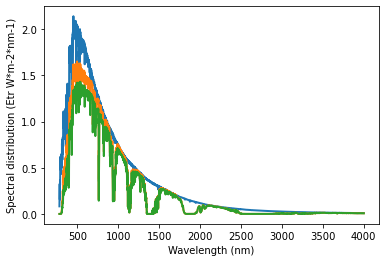

In [96]:
plt.plot(datafile, 
         linewidth=2)
plt.ylabel('Spectral distribution (Etr W*m-2*nm-1)')
plt.xlabel('Wavelength (nm)')

We start calculate the UV content in AM0, AM1.5G and AM1.5D.

In [86]:
for spectra in ['AM0', 'AM1.5G', 'AM1.5D']:
    irradiance=np.trapz(datafile[spectra][datafile.index<400])
    print('UV irradiance in ' + spectra + ' = ' + str(irradiance.round(1)) + ' W/m2')

UV irradiance in AM0 = 204.0 W/m2
UV irradiance in AM1.5G = 91.1 W/m2
UV irradiance in AM1.5D = 60.2 W/m2


***(b)Using the provided Quantum Efficiency (QE), calculate the Spectral Response (SR) of a Silicon solar cell. Plot the QE and SR as a function of wavelength***

We define the relevant constants. 

In [89]:
h=6.63*10**(-34) # [J·s] Planck constant
e=1.60*10**(-19) #C electron charge
c =299792458 #[m/s] Light speed

In [93]:
QE = pd.read_csv('data/QE_Silicon.csv', index_col=0, header=0) 
QE

,QE Silicon Solar cell
nm,
305,0.185579
310,0.243200
315,0.298992
320,0.353041
325,0.405425
...,...
1130,0.081951
1135,0.067769
1140,0.053712


We plot the Quantum Efficiency and Spectral Response

In [164]:
SR=pd.Series(index=QE.index,
            data=[QE.loc[i,'QE Silicon Solar cell']*e*i*0.000000001/(h*c) for i in QE.index])


Text(0.5, 0, 'Wavelength (nm)')

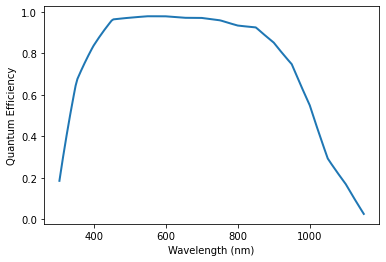

In [165]:
plt.plot(QE, 
         linewidth=2)
plt.ylabel('Quantum Efficiency')
plt.xlabel('Wavelength (nm)')

Text(0.5, 0, 'Wavelength (nm)')

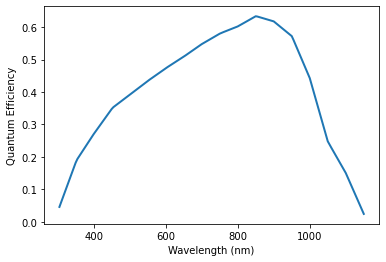

In [166]:
plt.plot(SR, 
         linewidth=2)
plt.ylabel('Quantum Efficiency')
plt.xlabel('Wavelength (nm)')

***(c) Estimate the photocurrent generated by a Silicon solar cell illuminated by the refer-ence spectrum AM1.5 G***

First, we need to interpolate the spectra at those datapoints included in the SR. 

In [170]:
spectra=datafile['AM1.5G']
spectra_interpolated=np.interp(SR.index, spectra.index, spectra.values)

array([0.0165, 0.0509, 0.136 , 0.205 , 0.279 , 0.471 , 0.464 , 0.502 ,
       0.459 , 0.528 , 0.611 , 0.598 , 0.624 , 0.755 , 0.589 , 0.701 ,
       0.674 , 0.797 , 0.808 , 1.11  , 1.15  , 1.05  , 1.23  , 1.12  ,
       1.25  , 0.875 , 1.25  , 1.35  , 1.46  , 1.56  , 1.52  , 1.53  ,
       1.54  , 1.51  , 1.62  , 1.62  , 1.57  , 1.62  , 1.65  , 1.55  ,
       1.56  , 1.55  , 1.53  , 1.52  , 1.58  , 1.54  , 1.55  , 1.48  ,
       1.54  , 1.54  , 1.56  , 1.47  , 1.52  , 1.48  , 1.48  , 1.5   ,
       1.53  , 1.37  , 1.43  , 1.48  , 1.49  , 1.47  , 1.47  , 1.47  ,
       1.4   , 1.39  , 1.45  , 1.43  , 1.46  , 1.36  , 1.35  , 1.4   ,
       1.42  , 1.42  , 1.4   , 1.4   , 1.37  , 1.18  , 1.27  , 1.28  ,
       1.32  , 1.32  , 1.26  , 0.986 , 1.04  , 1.13  , 1.22  , 1.22  ,
       1.25  , 1.23  , 1.24  , 0.266 , 0.686 , 1.16  , 1.18  , 1.16  ,
       1.16  , 1.09  , 1.09  , 1.07  , 1.05  , 1.06  , 0.895 , 0.862 ,
       0.969 , 0.916 , 1.    , 1.02  , 1.02  , 0.894 , 0.913 , 0.988 ,
      

Then, we calculate the integral

$J=\int G(\lambda)·SR(\lambda) d \lambda$

In [181]:
I = np.trapz([x*y for x,y in zip(SR, spectra_interpolated)], x=SR.index)*1000/10000 # A-> mA ; m2 -> cm2
print('Photocurrent density = ' + str(I.round(1)) + ' mA/cm2')

Photocurrent density = 36.73mA/cm2
